#### Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#### T1. Data Exploration: Load the Chicago parcels dataset using Pandas.


Steps:
1. Install lonboard

In [ ]:
pip install lonboard

2. Import necessary Libraries:

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, ScatterplotLayer

3. Then I used pandas to load the chicago parcel dataset. Here I added the Chicago_parcels.shp into google drive and then from this collab I navigated through contents>drive>MyDrive>Colab Notebooks>data>Assignment_2 till i found the correct file

In [ ]:
Chicago_Parcels= gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/Assignment_2/chicago_parcels/Chicago_parcels.shp')

#### T2. Display the first few rows of the dataset. Investigate the available attributes and their data types.

Steps:
1. Here I used the .head(5) function to view the first few rows of the dataset.
2. Then I used the .info() function to gain information on the dataset.

In [ ]:
Chicago_Parcels.head(5)

POLY_ID  ID  AREA    PIN_OLD        PIN  \
0        1  93  0.01  836300010  836300010   
1        2  94  0.00  836300011  836300011   
2        3  96  0.02  836300013  836300013   
3        4  95  0.01  836300012  836300012   
4        5  92  0.01  836300009  836300009   

                                            geometry  
0  POLYGON ((1091182.694 1942890.287, 1091173.159...  
1  POLYGON ((1092430.298 1943191.955, 1092463.452...  
2  POLYGON ((1092323.996 1942962.61, 1092301.306 ...  
3  POLYGON ((1092024.119 1942447.762, 1091997.19 ...  
4  POLYGON ((1091970.533 1942338.191, 1091929.082...

In [ ]:
Chicago_Parcels.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 592521 entries, 0 to 592520
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   POLY_ID   592521 non-null  int32   
 1   ID        592521 non-null  int64   
 2   AREA      592521 non-null  float64 
 3   PIN_OLD   592521 non-null  int64   
 4   PIN       592521 non-null  int64   
 5   geometry  592521 non-null  geometry
dtypes: float64(1), geometry(1), int32(1), int64(3)
memory usage: 24.9 MB


#### T3. Create a map to visualize the spatial distribution of tax parcel polygons in Chicago. This is a dataset with more than a half millions of records, therefore if you use the traditional matplotlib or pandas you will reach the RAM limit of Colab, you need to use lonboard library and the SolidPolygonLayer layer to render polygons.

In [ ]:
from lonboard import Map, SolidPolygonLayer

In [ ]:
gdf = gpd.GeoDataFrame(Chicago_Parcels)

In [22]:
layer = SolidPolygonLayer.from_geopandas(
    gdf,
    get_fill_color=[255, 0, 0],
)
m = Map(layer)
m

/usr/local/lib/python3.10/dist-packages/lonboard/_geoarrow/ops/reproject.py:107: UserWarning: Input being reprojected to EPSG:4326 CRS.
Lonboard is only able to render data in EPSG:4326 projection.
  warnings.warn(


Map(custom_attribution='', layers=(SolidPolygonLayer(get_fill_color=[255, 0, 0], table=arro3.core.Table
------…

#### T4. Correlation Analysis: Explore correlations between spatial attributes (latitude, longitude) and numerical attributes. Using the text cell, provide insights into any observed correlations.

In [ ]:
Chicago_Parcels.shape

(592521, 6)

In [ ]:
Chicago_Parcels[['latitude','longitude']]=Chicago_Parcels.geometry.centroid.get_coordinates(ignore_index=True)
Chicago_Parcels.head()

POLY_ID  ID  AREA    PIN_OLD        PIN  \
0        1  93  0.01  836300010  836300010   
1        2  94  0.00  836300011  836300011   
2        3  96  0.02  836300013  836300013   
3        4  95  0.01  836300012  836300012   
4        5  92  0.01  836300009  836300009   

                                            geometry      latitude  \
0  POLYGON ((1091182.694 1942890.287, 1091173.159...  1.091780e+06   
1  POLYGON ((1092430.298 1943191.955, 1092463.452...  1.092427e+06   
2  POLYGON ((1092323.996 1942962.61, 1092301.306 ...  1.091688e+06   
3  POLYGON ((1092024.119 1942447.762, 1091997.19 ...  1.091538e+06   
4  POLYGON ((1091970.533 1942338.191, 1091929.082...  1.091543e+06   

      longitude  
0  1.943042e+06  
1  1.943134e+06  
2  1.942695e+06  
3  1.942343e+06  
4  1.942083e+06

In [ ]:
# Calculate Pearson correlation between latitude, longitude and numerical attributes
correlation = Chicago_Parcels[['latitude', 'longitude','AREA']].corr(method='pearson')

print("Correlation between Latitude, Longitude and Area:")
print(correlation)


Correlation between Latitude, Longitude and Area:
           latitude  longitude      AREA
latitude   1.000000  -0.612231  0.005312
longitude -0.612231   1.000000 -0.010339
AREA       0.005312  -0.010339  1.000000


In [ ]:
Chicago_Parcels.corr(method='pearson', numeric_only=True)

POLY_ID        ID      AREA   PIN_OLD       PIN  latitude  \
POLY_ID    1.000000  0.281011 -0.007202  0.099622  0.099810  0.592573   
ID         0.281011  1.000000  0.007726 -0.479761 -0.449598  0.705091   
AREA      -0.007202  0.007726  1.000000 -0.012953 -0.013246  0.005312   
PIN_OLD    0.099622 -0.479761 -0.012953  1.000000  0.982657 -0.337835   
PIN        0.099810 -0.449598 -0.013246  0.982657  1.000000 -0.346813   
latitude   0.592573  0.705091  0.005312 -0.337835 -0.346813  1.000000   
longitude -0.156919 -0.949257 -0.010339  0.478436  0.485506 -0.612231   

           longitude  
POLY_ID    -0.156919  
ID         -0.949257  
AREA       -0.010339  
PIN_OLD     0.478436  
PIN         0.485506  
latitude   -0.612231  
longitude   1.000000

#### T5. K-Means Clustering: Implement K-Means clustering with different values of n_clusters and T6.  Visualize the clustering results for each value of n_clusters, using multiple lonboard maps, and customized colour ramps.

<Axes: >

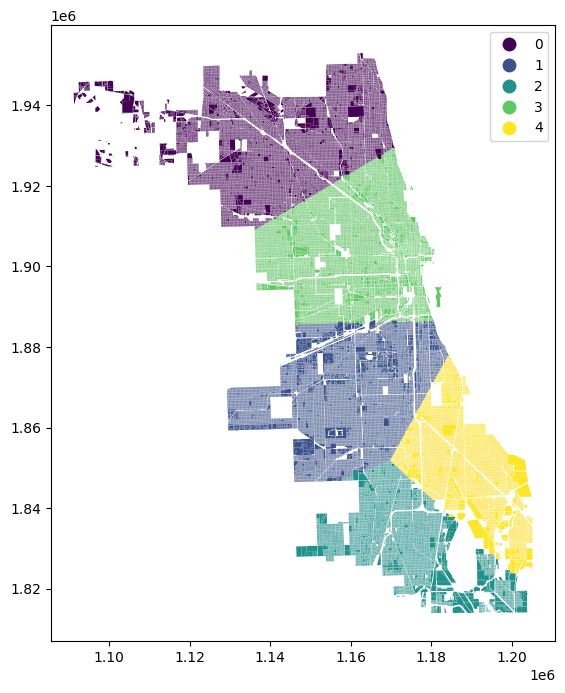

In [ ]:
kmeans_5 = KMeans(n_clusters=5, random_state=42)
Chicago_Parcels['kmeans_cluster_5'] = kmeans_5.fit_predict(Chicago_Parcels[['longitude', 'latitude']])
Chicago_Parcels.plot(column='kmeans_cluster_5', categorical=True, legend=True, figsize=(8, 8), cmap='viridis')

<Axes: >

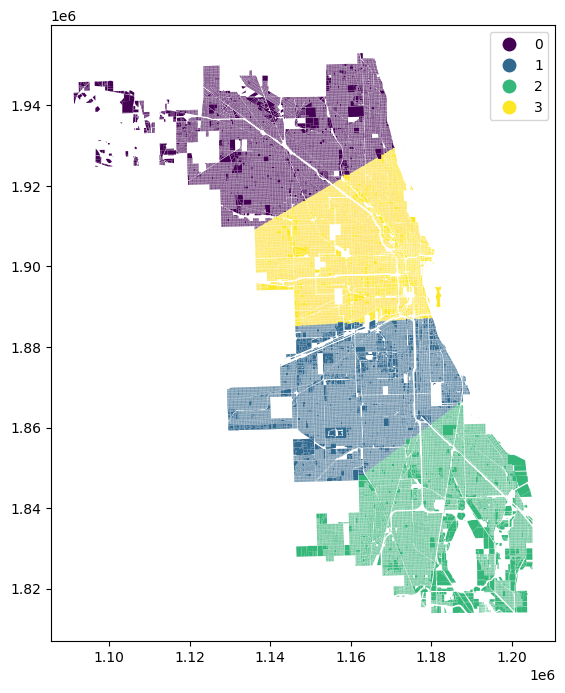

In [ ]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
Chicago_Parcels['kmeans_cluster_4'] = kmeans_4.fit_predict(Chicago_Parcels[['longitude', 'latitude']])
Chicago_Parcels.plot(column='kmeans_cluster_4', categorical=True, legend=True, figsize=(8, 8), cmap='viridis')

<Axes: >

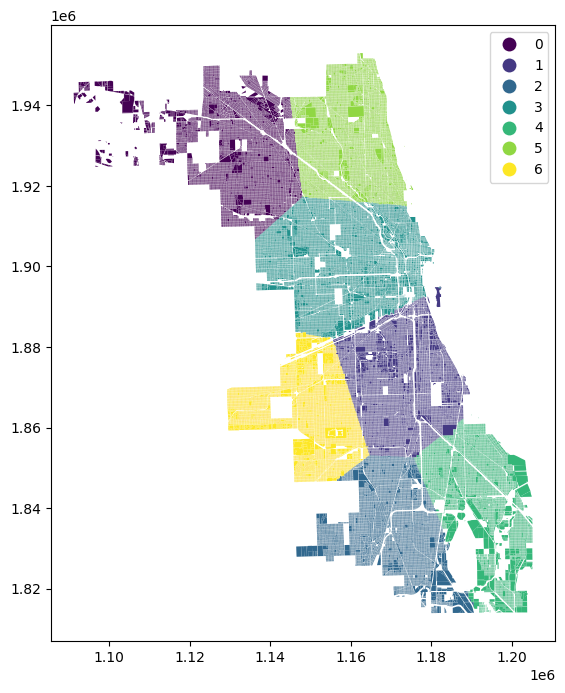

In [ ]:
kmeans_7 = KMeans(n_clusters=7, random_state=42)
Chicago_Parcels['kmeans_cluster_7'] = kmeans_7.fit_predict(Chicago_Parcels[['longitude', 'latitude']])
Chicago_Parcels.plot(column='kmeans_cluster_7', categorical=True, legend=True, figsize=(8, 8), cmap='viridis')

<Axes: >

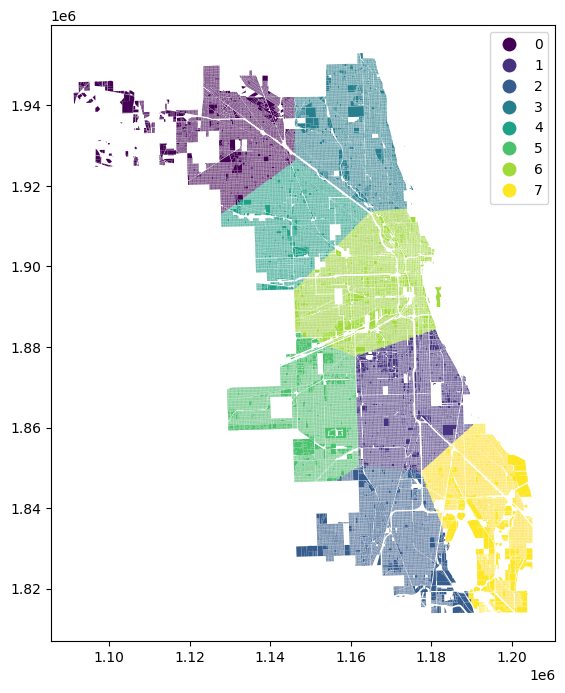

In [ ]:
kmeans_8 = KMeans(n_clusters=8, random_state=42)
Chicago_Parcels['kmeans_cluster_8'] = kmeans_8.fit_predict(Chicago_Parcels[['longitude', 'latitude']])
Chicago_Parcels.plot(column='kmeans_cluster_8', categorical=True, legend=True, figsize=(8, 8), cmap='viridis')

### T7. Evaluate the clustering results and choose an “optimal” value for n_clusters. Justify your choice in a markdown cell.


The "optimal" value for the number of cluster (n_clusters) is 8. My justification for this is that 8 was the largest number of clustered I selected to test and shows clear distinction at each border. There are not so many clusters that the result becomes overwhelming with data but generally the higher the number of clusters reduces the variation with each cluster. Interoperability is important and so 8 is satisfactory here.

#### T8. DBSCAN Clustering: Implement the DBSCAN method. Experiment with different values of eps and min_samples in DBSCAN ( at least three) and T9. Plot the clustering results for each combination of parameters. Therefore, you should create a plot matrix 3*3 ( min_samples and eps)


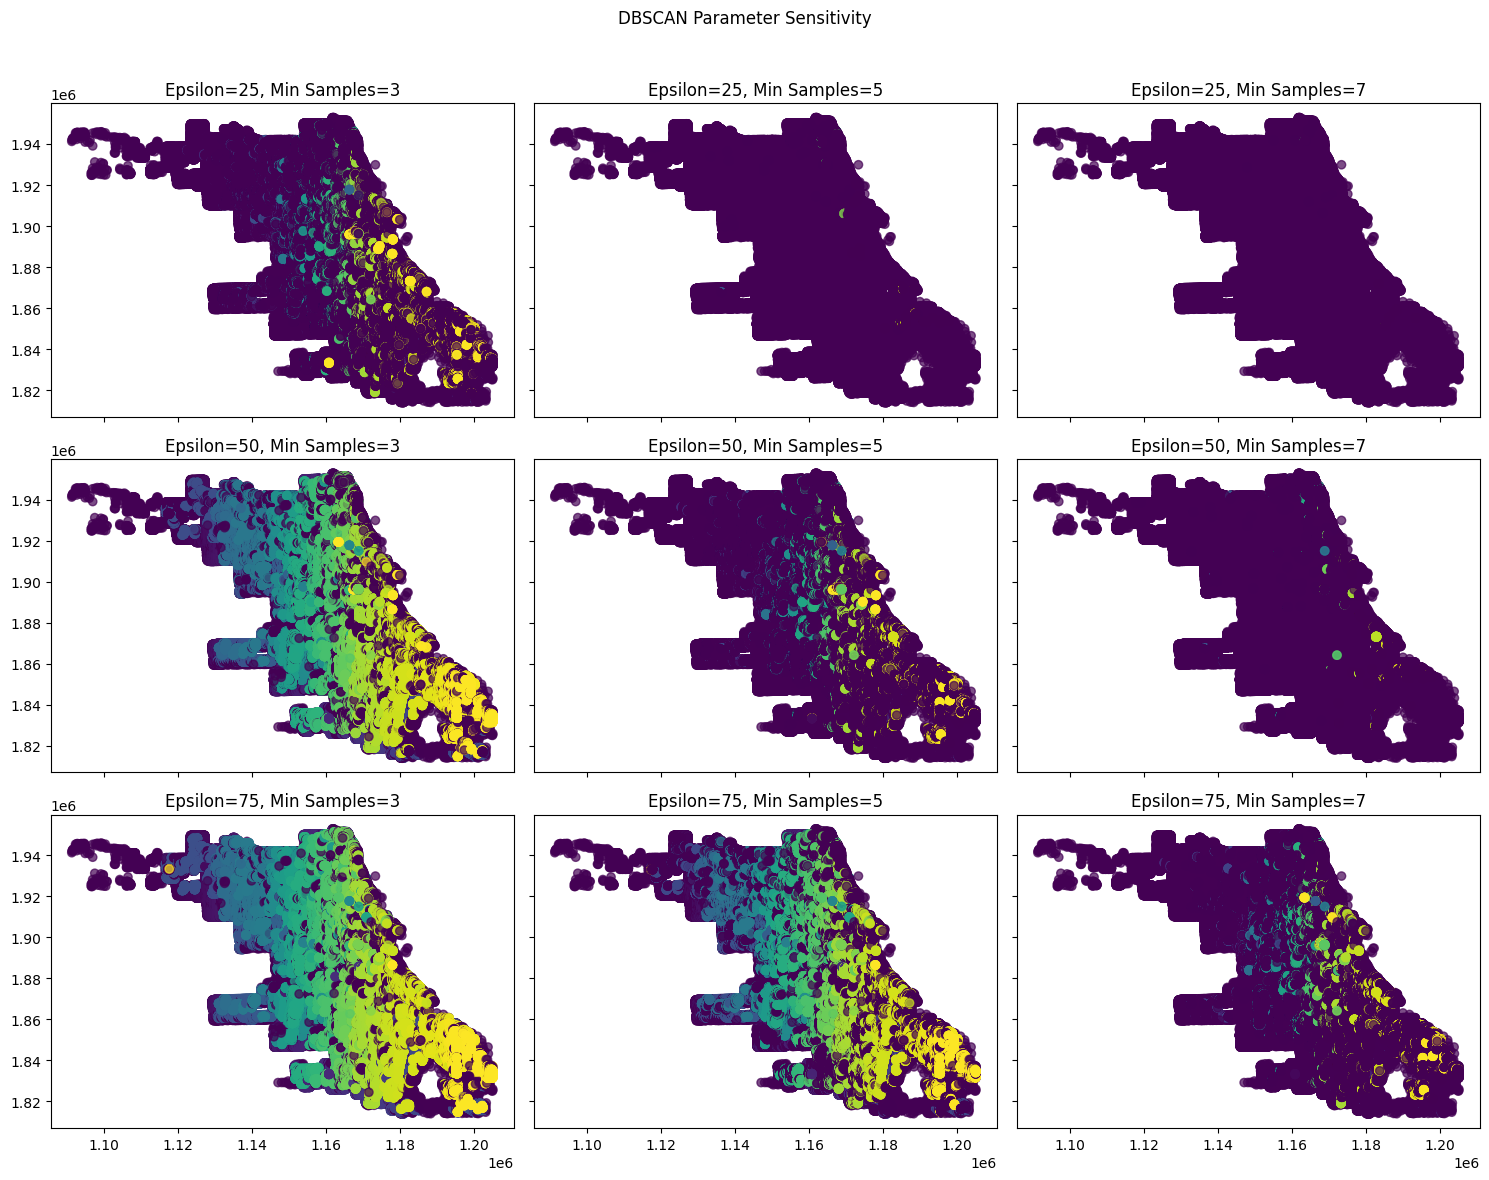

In [ ]:
# Function to visualize parameters
# Apply DBSCAN to the data here, and then use the results for the plots in the c parameter
# Plot the clusters
def visualize_dbscan_parameters(Chicago_Parcels, epsilon_values, min_samples_values):
    fig, axes = plt.subplots(len(epsilon_values), len(min_samples_values), figsize=(15,12), sharex=True, sharey=True)
    fig.suptitle('DBSCAN Parameter Sensitivity')

    for i, epsilon in enumerate(epsilon_values):
        for j, min_samples in enumerate(min_samples_values):
            dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
            Chicago_Parcels['cluster_result'] = dbscan.fit_predict(Chicago_Parcels[['latitude', 'longitude']])
            axes[i, j].scatter(Chicago_Parcels['latitude'], Chicago_Parcels['longitude'], c=Chicago_Parcels['cluster_result'], cmap='viridis', alpha=0.7)
            axes[i, j].set_title(f'Epsilon={epsilon}, Min Samples={min_samples}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage:
epsilon_values = [25, 50, 75]
min_samples_values = [3, 5, 7]

# Run your function to visualize DBSCAN parameters
visualize_dbscan_parameters(Chicago_Parcels, epsilon_values, min_samples_values)

#### T10. Using a text cell write your insights about the impact of modifying the eps and min_samples parameters, and finally recommend suitable values for eps and min_samples based on your analysis. Note: Consider the real-world implications of your findings, especially in the context of urban planning or data-driven decision-making

Modifying the eps and min_samples changes the parameter of the DBSCAN. Epsilons or eps helps to difine the maximum possible distance between two points, then decides if they would be considered neighbours or not. min_samples determines how many points are needed to form a cluster, when min_samples are large this leads to more densely-packed clusters, but also increases noise.

I would suggest Epsilon=75 and min_samples=5. As this shows the most differentiation.

End